## *Exploring the mean differences for subjects whitin tasks*

* First extract the mean alpha power for each subject in each condition
* Calculate the difference between corresponding tasks and states
* print out the difference

In [3]:
import numpy as np

from eeg_analyzer.dataset import Dataset
from utils.config import DATASETS

dataset_config = DATASETS['jin2019']
dataset = Dataset(dataset_config)
dataset.load_subjects()

session_id = 1

# Extract the mean alpha power for each subject in each condition (also within channel)
alpha_powers = dataset.get_mean_alpha_diff_by_condition(session_id)

for subj_id, alpha_power in alpha_powers.items():
    print(f"Subject ID: {subj_id}, Alpha Power Difference: {alpha_power}")


Subject ID: 1, Alpha Power Difference: {'vs': array([-1.44405482e+00, -1.29934672e+00, -1.45755409e+00, -1.38857843e+00,
       -1.20758624e+00, -1.11814197e+00, -1.04424515e+00, -9.23849225e-01,
       -1.22383209e+00, -1.20825568e+00, -1.29672485e+00, -6.17209748e-01,
       -1.43143432e+00, -1.91334283e+00, -1.78769767e+00, -1.85311781e+00,
       -1.58329667e+00, -9.15795276e-01,  1.32686671e-01, -1.66254633e+00,
       -8.26231738e-01, -1.50578736e+00, -3.01352074e+00, -2.82543396e+00,
       -3.66484888e+00, -1.84236403e+00, -3.51110179e+00, -1.55344783e+00,
       -2.26275730e+00, -1.32635343e+00, -1.16581183e+00, -3.40491413e-04,
       -1.78850940e+00, -1.62224405e+00, -1.05468310e+00, -1.63127562e+00,
       -1.80470681e+00, -1.78873334e+00, -1.65168974e+00, -1.18611768e+00,
       -8.73577840e-01, -5.62601410e-01, -1.95025688e-01, -7.94303545e-01,
       -1.29884779e+00, -1.27027449e+00, -9.70748959e-01, -3.37159074e-01,
       -1.23891046e+00, -1.53298810e+00, -1.31627146e+

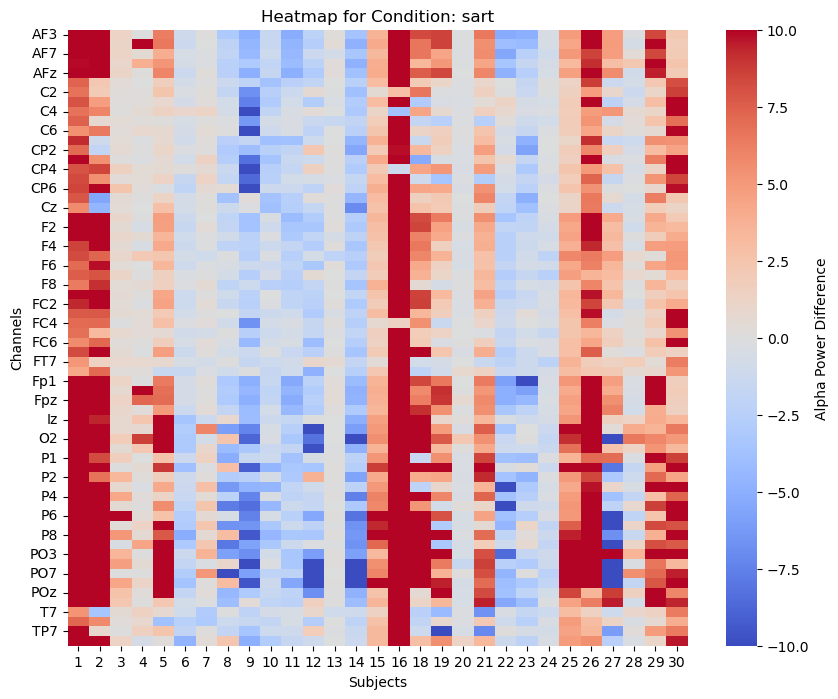

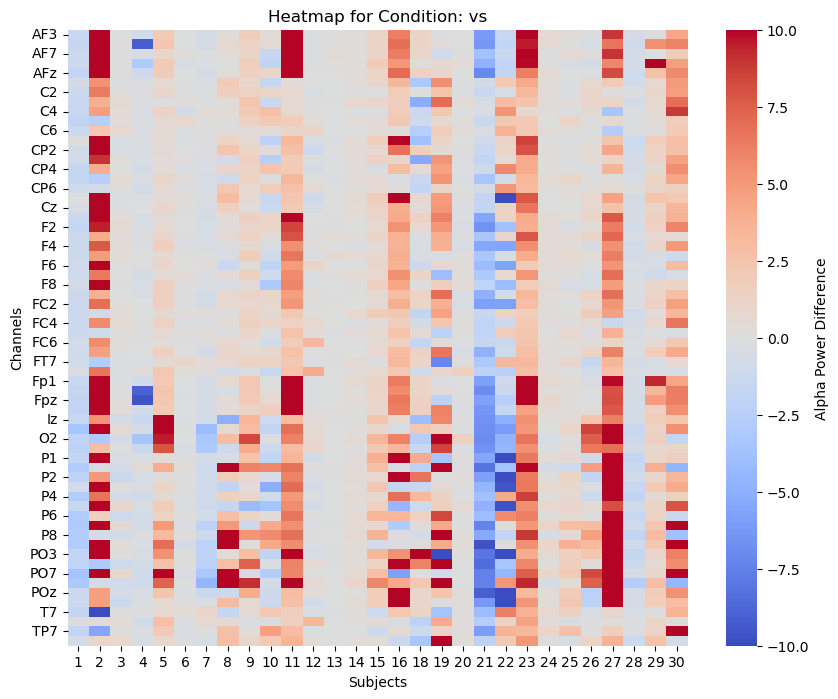

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get channel names
channel_names = dataset.get_channel_names()

# Convert alpha_powers to a DataFrame
alpha_df = pd.DataFrame([
    {"Subject": subj_id, "Condition": condition, "Channel": channel, "AlphaDiff": alpha_diff}
    for subj_id, conditions in alpha_powers.items()
    for condition, alpha_diffs in conditions.items()
    for channel, alpha_diff in zip(channel_names, alpha_diffs)
])

# Clip extreme values to mitigate the effect of outliers
clip_threshold = 10  # Define a threshold for clipping
alpha_df["AlphaDiff"] = alpha_df["AlphaDiff"].clip(lower=-clip_threshold, upper=clip_threshold)

# Group by condition and plot heatmaps
for condition_name, group in alpha_df.groupby("Condition"):
    heatmap_data = group.pivot(index="Channel", columns="Subject", values="AlphaDiff")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data=heatmap_data,
        cmap="coolwarm",
        center=0,  # Center the color map at 0
        cbar_kws={'label': 'Alpha Power Difference'}
    )
    plt.title(f"Heatmap for Condition: {condition_name}")
    plt.ylabel("Channels")
    plt.xlabel("Subjects")
    plt.show()

In [5]:
# Doing the same for session 2
session_id = 2
alpha_powers = dataset.get_mean_alpha_diff_by_condition(session_id)

for subj_id, alpha_power in alpha_powers.items():
    print(f"Subject ID: {subj_id}, Alpha Power Difference: {alpha_power}")

Subject ID: 1, Alpha Power Difference: {'vs': array([-5.16902027, -3.53471852, -4.92811074, -3.37898575, -2.67359894,
       -2.38705941, -2.31370242, -2.00238703, -1.89343951, -1.79281146,
       -2.11085093, -2.69346686, -2.45994888, -1.84054655, -1.89353951,
       -2.91201825, -2.92673938, -3.63428849, -3.98729926, -5.41184989,
       -5.661605  , -5.11309221, -3.76368564, -4.17858916, -5.78735189,
       -5.75643414, -5.5315171 , -5.18036381, -5.7448806 , -5.74922917,
       -3.75437897, -2.16156662, -5.77817641, -5.21070318, -3.79360689,
       -5.41822077, -5.35111185, -4.22067202, -4.49154139, -3.68199801,
       -3.26326176, -2.59371868, -2.07474647, -2.23529368, -2.6445397 ,
       -3.22531268, -1.90985455, -1.88299066, -1.75543952, -2.091709  ,
       -0.530509  , -0.01887336, -1.86913604, -1.22809797, -1.62417662,
       -2.12077733, -4.37509686, -3.09930327, -3.04533495, -3.84705823,
       -4.34850927, -6.35081524, -4.82144457, -4.84121269]), 'sart': array([12.37466203,  

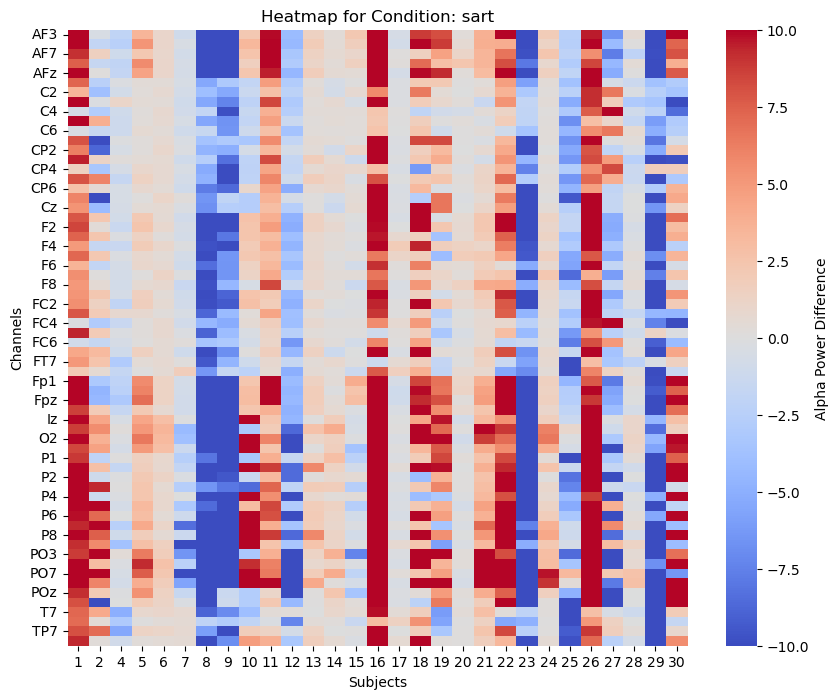

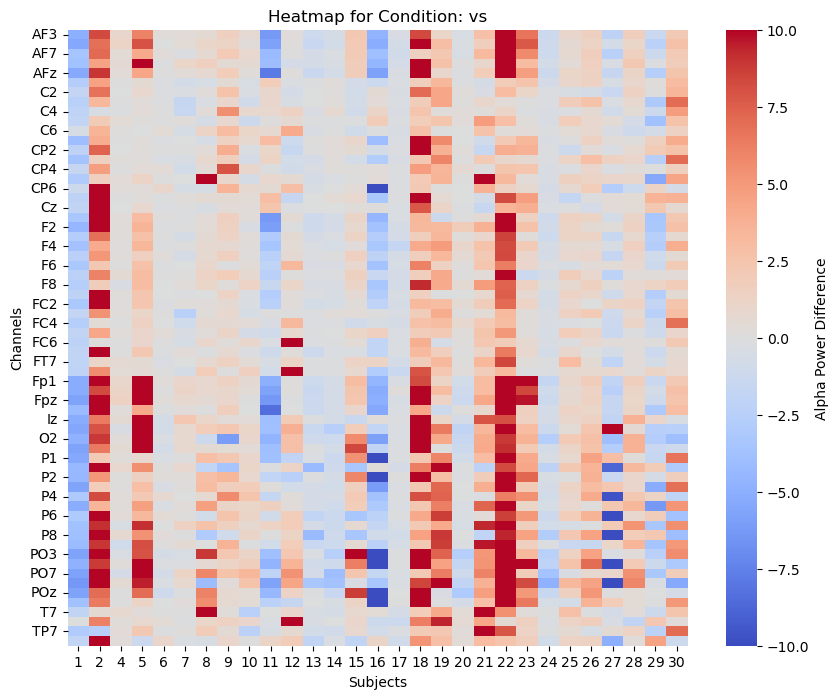

In [6]:
# Convert alpha_powers to a DataFrame
alpha_df = pd.DataFrame([
    {"Subject": subj_id, "Condition": condition, "Channel": channel, "AlphaDiff": alpha_diff}
    for subj_id, conditions in alpha_powers.items()
    for condition, alpha_diffs in conditions.items()
    for channel, alpha_diff in zip(channel_names, alpha_diffs)
])

# Clip extreme values to mitigate the effect of outliers
clip_threshold = 10  # Define a threshold for clipping
alpha_df["AlphaDiff"] = alpha_df["AlphaDiff"].clip(lower=-clip_threshold, upper=clip_threshold)

# Group by condition and plot heatmaps
for condition_name, group in alpha_df.groupby("Condition"):
    heatmap_data = group.pivot(index="Channel", columns="Subject", values="AlphaDiff")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data=heatmap_data,
        cmap="coolwarm",
        center=0,  # Center the color map at 0
        cbar_kws={'label': 'Alpha Power Difference'}
    )
    plt.title(f"Heatmap for Condition: {condition_name}")
    plt.ylabel("Channels")
    plt.xlabel("Subjects")
    plt.show()